## Loading graph and importing libraries

In [1]:
import sys
import os
import pandas as pd
import pickle

import networkx as nx


sys.path.append(os.path.abspath('..'))

from src.features.structural_alg import get_clustering_coefficient

Configurazione completata. Output sarà:  ../data/processed/amazon_graph.pickle


In [2]:
with open("../data/processed/amazon_graph.pickle", "rb") as f:
    G = pickle.load(f)

## Computing Clustering Coefficient

In [3]:
# Using NetworkX function
clust_coeff_nx = get_clustering_coefficient(G, M=G.number_of_edges(), use_networkx=True)

NetworkX function

In [4]:
# Save results

df_clus_nx = pd.DataFrame(list(clust_coeff_nx.items()), columns=['ASIN', 'ClusteringCoefficient'])
display(df_clus_nx.head(5))
# Save to CSV
df_clus_nx.to_csv("../data/processed/clus_scores_nx.csv", index=False)
# Now you can use the scores
print(f"Computed cc for {len(clust_coeff_nx)} nodes.")

,ASIN,ClusteringCoefficient
0,0827229534,0.290323
1,0738700797,0.563953
2,0842328327,0.400000
3,1577943082,0.888889
4,0486220125,0.333333


Computed cc for 334843 nodes.


Hand-made function

In [5]:
# Using hand-made function
clust_coeffs = get_clustering_coefficient(G, M=G.number_of_edges(), use_networkx=False)

In [6]:
# Save results

df_clust = pd.DataFrame(list(clust_coeffs.items()), columns=['ASIN', 'ClusteringCoefficient'])
display(df_clust.head(5))
# Save to CSV
df_clust.to_csv("../data/processed/clus_scores.csv", index=False)

# Now you can use the scores
print(f"Computed cc for {len(clust_coeffs)} nodes.")

,ASIN,ClusteringCoefficient
0,0827229534,0.181818
1,0738700797,0.269231
2,0842328327,0.366667
3,1577943082,0.500000
4,0486220125,0.250000


Computed cc for 334843 nodes.


## Comparison of the results obtained by the two implementations

In the distribution graphs it can be observed that there are about 10^4 nodes with clustering coefficient equal to 1.0 (i.e. a node is contained in a number of triangles equal to the number of potential triangle it could contained in).

The top 10 values seem so different because the NetworkX function shows the 10 nodes with the highest score with smaller index, instead the hand-made function shows them in a randomic order of indices.

In [7]:
# top ten nodes by clustering coefficient
top_10 = df_clus_nx.nlargest(10, 'ClusteringCoefficient')
print("Top 10 nodes by nx clustering coefficient:")
print(top_10)

# top ten nodes by clustering coefficient using hand-made function
top_10_test = df_clust.nlargest(10, 'ClusteringCoefficient')  
print("Top 10 nodes by test clustering coefficient:")
print(top_10_test)

Top 10 nodes by nx clustering coefficient:
           ASIN  ClusteringCoefficient
12   0849311012                    1.0
33   B00004W1WI                    1.0
66   0743509315                    1.0
69   0820451576                    1.0
74   0684868008                    1.0
76   0590464272                    1.0
90   B00003Q5AA                    1.0
104  0807842109                    1.0
105  0226309045                    1.0
113  B00000IC8F                    1.0
Top 10 nodes by test clustering coefficient:
            ASIN  ClusteringCoefficient
113   B00000IC8F                    1.0
275   B0000296JC                    1.0
346   B000001OOP                    1.0
747   1563978091                    1.0
819   0786868821                    1.0
850   1864500069                    1.0
995   B00006DXXS                    1.0
1013  1583762027                    1.0
1087  0834216558                    1.0
1281  B000024613                    1.0


The two distributions shown in the graphs below are similar in height and trend.

Number of nodes with zero clustering coefficient (nx): 69773


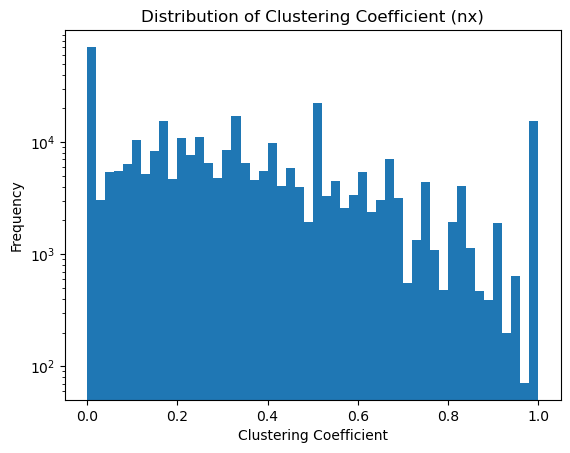

In [8]:
# Number of zero elements in clustering coefficient using NetworkX function
zero_count = (df_clus_nx['ClusteringCoefficient'] == 0.0).sum()
print(f"Number of nodes with zero clustering coefficient (nx): {zero_count}")

# Distribution of clustering coefficient values
import matplotlib.pyplot as plt
plt.hist(df_clus_nx['ClusteringCoefficient'], bins=50)
plt.title('Distribution of Clustering Coefficient (nx)')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

Number of nodes with zero clustering coefficient (test): 69773


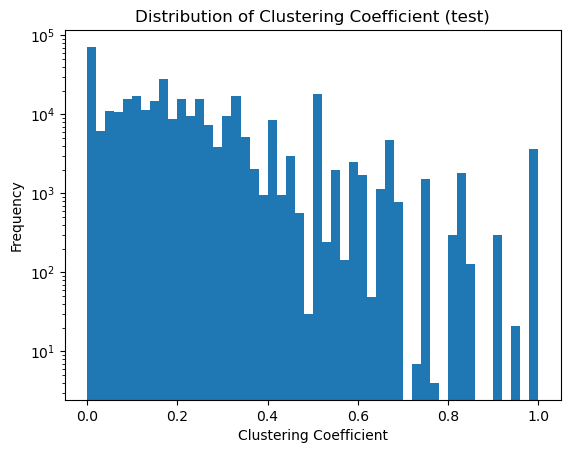

In [9]:
# Number of zero elements in clustering coefficient using hand-made function
zero_count_test = (df_clust['ClusteringCoefficient'] == 0.0).sum()
print(f"Number of nodes with zero clustering coefficient (test): {zero_count_test}")

# Distribution of clustering coefficient values using hand-made function
plt.hist(df_clust['ClusteringCoefficient'], bins=50)    
plt.title('Distribution of Clustering Coefficient (test)')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()